# Lecture 2 | Dimensionality Reduction & Feature Selection

- from a theoretical point of view, increasing the number of features should lead to better performance

- in practice, the inclusion of more feature leads to worse performance.

- the number of training examples required increases exponentially with dimentionality

## Benefits of Dimensionality Reduction

- Reduce Overfitting: Less redundant data means less opportunity to make decisions based on noise.

- Improves Accuracy: Less misleading data means modeling accuracy improves

- Reduces Training Time: Fewer data points reduce algorithm complexity and algorithms train faster

- Also means we will have less datat to store.

## Options

- Regularization
    - Cost function in models penalizes more complex models

- Feature Selection
    - Filtering irrelevant or redundant features fromt the dataset
    - Done automatically as part of some algorithms
    - Use a subset of the original features

- Feature Extraction
    - Create new features based on original features

**Typically do not keep features where:**

- Almost all instance have the same value (no information)

- almost all instances have unique values (ssn, phone-number)

- The feature is highly correlated with another feature

## Feature selection

- Search
    - Exponential
    - Backward, Froward, Genetic, Others

- Variance Threshold
    - value does not change much between observations

- Correlation Threshold

- Scikit-Learn includes some tools

## Wrapper Concept

- Optimizes for a specific learning algortithm
- The features subset selection algorithm is a wrapper around the learning algirthm

1. Pick a feature subset and pass it in to learning algorithm
2. Create training/test set based on the feature subset
3. train the learning algorithm with the training set
4. find accuracy (objective) with validation set
5. Repeat for all feature subsets and pick the feature subset which led to the highest predictive accuracy (or other objective)

- Basic approach is simple
- Variations are based on how to select the feature subset, since there are an exponential number of subsets

## Feature Selection Searching

- Exhaustive Search - Exhausting
- Forward Search - O(n^2 * learning/testing time) - Greedy (we add features to it)
    1. Score each feature by itself and add teh best feature to the initially empty set Feature Set (FS)
    2. Try each subset consisting of the current FS plus one remaining feature and add the best feature to FS
    3. Continue until stop getting significant improvement

- Backward Search - O(n^2 * Learning/Testing time) - Greedy (we subtract features from it)
    1. Score the initial compete set FS
    2. Try each subset consisting of the current FS minus one feature in FS and drop the feature from FS causing leas decrease in accuracy
    3. Continue until begin to get significant decreases in accuracy

- Brand and bound and other heuristic approaches available

## Select Best

**SelectKBest class:**

- Suite of different statistical tests to select a specific number of features, i.e., Chi-Squared

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pld.read_csv('exampledata.csv')
X = data.iloc[:, 0:20] # independent columns
y = data.iloc[:, -1] # targest column i.e. price

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # naming the dataframe columns
print(featureScores.nlargest(10,'score')) # print 10 best features


## Feature Importance

- Use the feature importance property of the model

- Provides a score for each feature of your data, the higher the score the more importance or relevant is the feautures towards your output variable

- Feature importance is an inbuilt class that comes with tree based classifiers

- i.e. from scikit-learn

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('exampledata.csv')
X = data.iloc[:, 0:20] # independent columns
y = data.iloc[:, -1] # target column i.e. price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib. pyplot as plt

model = ExtraTreesClassifier
model.fit(X, y)
print (model.feature_importances_) 
# use inbuild class
# feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_),index = X.columns
feat_importances.nlargest(10). plot (kind = barh)

## Correlation matrix with heatmap

- Correlation states how the features are related to each other or the target variable

- coorrelation can be positive or negative

- heatmap makes it easy to identify wich features are most related to the target variable

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('exampledata.csv')
X = data.iloc[:, 0:20] # independent columns
y = data.iloc[:, -1] # target columns i.e. price range

# get correlationsof each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

# plot heatmap
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmpa='RdYlGn')

## Recursive Feature Elimination (RFE)

- RFE recursively removes atttributes and builds a model on those attributes that remain

- It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute

- i.e. from scikit-learn documentation

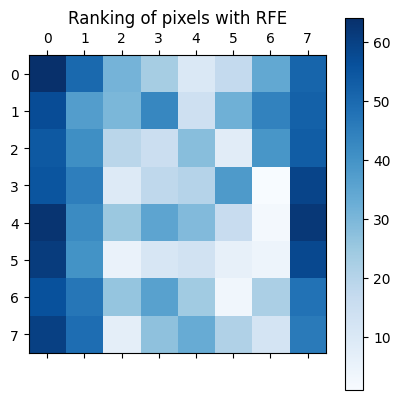

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# load the digits dataset
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# create the RFE object and rank each pixel
svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

## Feature Selection

- Creating a subset to improve accuracy and speed but requires up front effort
- Rich area for research
- Domain expertise can help but not required
- Many other techniques

# Lecture 3 | Principal Component Analysis

## Feature Extraction-PCA

- Principal Coponent analysis

- unsupervised linear transformation

- Identify correlation between features

- assume that the high dimensional data actually resides in a inherent low-dimensional space

- additional dimensions are just random noise

- goal is to recover these ingerent dimensions and discard noise dimensions

## Dimensionality Reduction

- Significant improvements can be achieved by first mapping (projecting) the data inot a lower-dimensional space.

## PCA

- Seek new set of bases that correspond to the highest variance in the data

- transform n-dimensional data to a new n-dimensional basis
    - The new dimension with the most variance is the first principal component
    - the next is the second principal component
    - Note Z_1 combines/fuses signifianct infomration from both x_1, and x_2

- Drop dimensions for which there is little variance


## PCA graphically

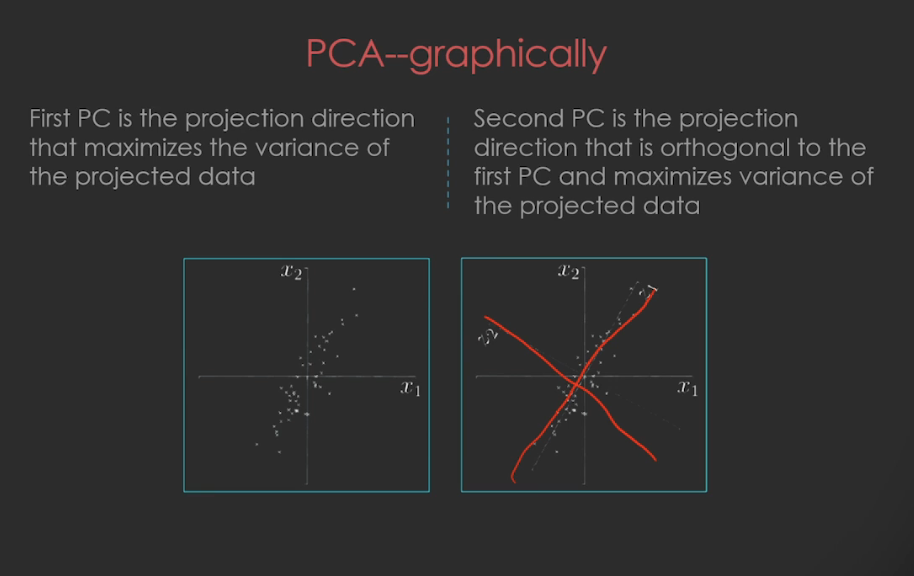

## Reduction and Reconstruction

- Full set of PCs comprise a new orthogonal basis for feature space whose axes are aligned with the maximum variances of orignial data

- Projection of original data onto first k PCs gives a reduced dimensionality representation of the data

- Transforming reduced dimensionality projection back into original space gives a reduced dimensionality reconstruction of the original data

- Reconstruction will have some error, but it can be small and often is acceptable given the other benefits of dimensionality reduction.

## Variance & Covariance

- Variance is a measure of data spread in one dimension (feature)

- Covariance measures how two dimensions (features) vary with respect to each other

$$var(X) = \frac{\sum^n_{i=1}(X_i - \bar X)(X_i - \bar X)}{(n-1)}$$

$$cov(X, Y) = \frac{\sum^n_{i=1}(X_i - \bar X)(Y_i - \bar Y)}{(n-1)}$$

## how it is done

- Mean center the data

- Compute covariance matrix $\sum$

- Calculate eigenvalues and eigenvectors of $\sum$
    - Eigenvector with largest eigenvalue $\lambda _1$ is 1st principal component (PC)
    - Eigenvectore with Kth largest eigenvalue $\lambda _k$ is Kth PC
    - $\lambda _k / \sum \lambda _i =$ proportion of variance captures by Kth PC

## Covariance Matrix

- Considering the sign (rather than exact value) of covariance
    - positive value means that as one feature increases or decreases the other does also (positively correlated)
    - negative value means that as one feature increases the other decreases and vice versa (negatively correlated)
    - a value close to zero means the features are independent 
    - if highly covariance, are both features necessary?

- Covariance matrix is an n x n matrix containing the covariance values for all pairs of features in a data set with n features (dimensions)

- The diagonal contains the covariance of a features with itself which is the variance (which is the squre of the standard deviation)

- The matrix is symmetric

## PCA in summary

- PCA is a linear transforamtion, so if the data is highly non-linear then the transformed data will be less informative
    - non linear dimensionality reduction techniques needed
    - PCA is good at removing redundant correlated features

- Caution: not a "cure all"

- Can lose important info in some cases
    - How would you know if it is effective?
    - just compare accuracies of the original vs transformed data set

- Unsupervised learning - is there perhaps value in the label?

# Lecture 4 | Linear Discriminant Analysis

Unlike PCA, doesn't maximize explained variance

Instead, it maximizes the seperability between classes

- Supervised method that can only be used with labeled data

- Dependent on scale, so normalize data set first

- Can be used as a classification algorithm itself

## LDA

Strengths
- Suprervised, which can (but doesn't always) improve the predictive performance of the extracted features.
- offers variations (i.e. quadratic LDA) to tackle specific roadblocks

Weaknesses (sam as PCA)
- New features are not easily interpretable
- Manually set or tune the number of components to keep

## More on LDA

- Assumes data modeled by a multivariate Gaussian distribution for each class c, with mean $\mu_c$ and a common covariance $\Sigma$

- Assumption of common covariance matrix implies
    - The posterior distribution over the classes has a linear form and
    - There is a linear discriminant function for each class

- The linear discriminant classifier is computed as 
$$y_c = X^T\Sigma^{-1}\mu_c - 1/2\mu^T+c\Sigma^{-1}\mu_c + log(n_c/n)$$
- Where $n_c$ is the number of examples of class c and n is the total number of examples

- Common variance matrix is obtained by pooling the covariance matrices from the different classes using a weighted average

- The data is classified by choosing the largest $y_c$

## Feature Subspace

- To reduce the dimensions of a d-dimensional data set by projectiong it onto a (k)-dimensional subspace (where k < d)

- Feature space data is well represented?
    - Compute eigen vectors from dataset
    - Collect them in scatter matrix
    - Generate k-dimensional data from d-dimensional dataset

## Scatter Matrix

- Within class scatter matrix $S_W = \sum^c_{i=1}S_i$

- In between class scatter matrix $S_B = \sum^c_{i-1}N_i(m_i-m)(m_i-m)^T$

- ***Maximize*** the between class measure & ***minimize*** the within class measure.

## LDA Steps

1. Compute the d-dimensional mean vectors

2. Compute the scatter matrices

3. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices.

4. Sort the eigenvalues and choose those with the largest eigenvalues to form a dxk dimensional matrix

5. Transform the samples into the new subspace

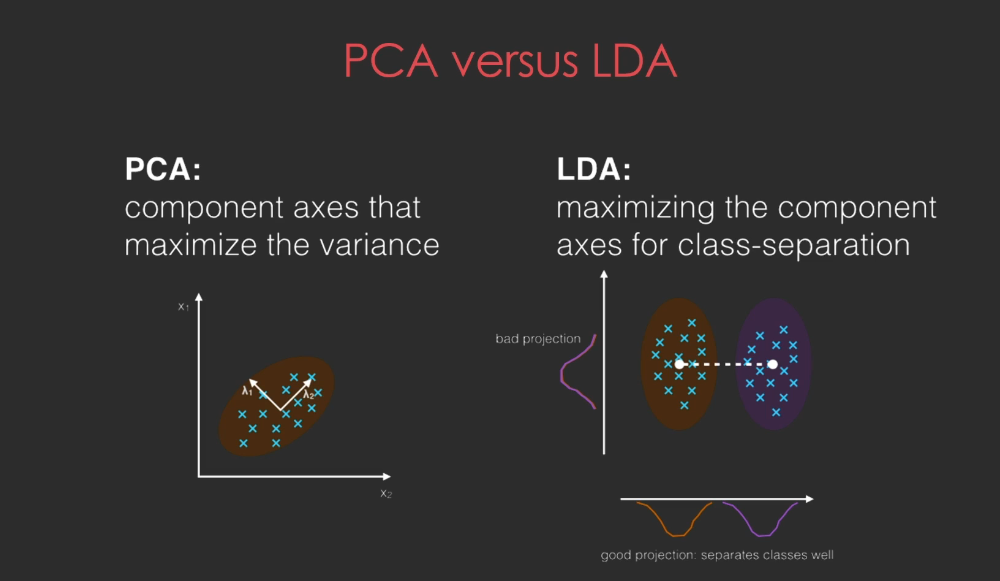

## QDA

- the QDA classifier is obtained by giving each class it's own variance matrix $\Sigma$

- In QDA, the decision boundaries defined by the posterior over classes are described by quadratic equations

- The quadratic discriminant function for each class c is:

$$f(X) = -\frac{1}{2}log|\Sigma_c|-\frac{1}{2}(X-\mu_c)\Sigma^{-1}_c(X-\mu_c)^T+log(n_c/n)$$

- These functions, as the ones for LDA, are produced by taking the log of the corresponding Gaussian model for each class
    - Constant terms can be ignored becuase such functions will be compared with another

## Additional Methods

- Feature Embedding

- Factor Analysis

- Singular Value Decomposition

- Matrix Factorization

- Multidimentional Scaling

- Canonical Correlation Analysis

- Isomap

- Locally Linear Embedding

- Laplacian Eigenmaps

## Example of LDA
Using the Iris dataset

In [5]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

# reading in the dateset
import ssl; ssl._create_default_https_context = ssl._create_stdlib_context
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
# convert class labels into numbers
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, [0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

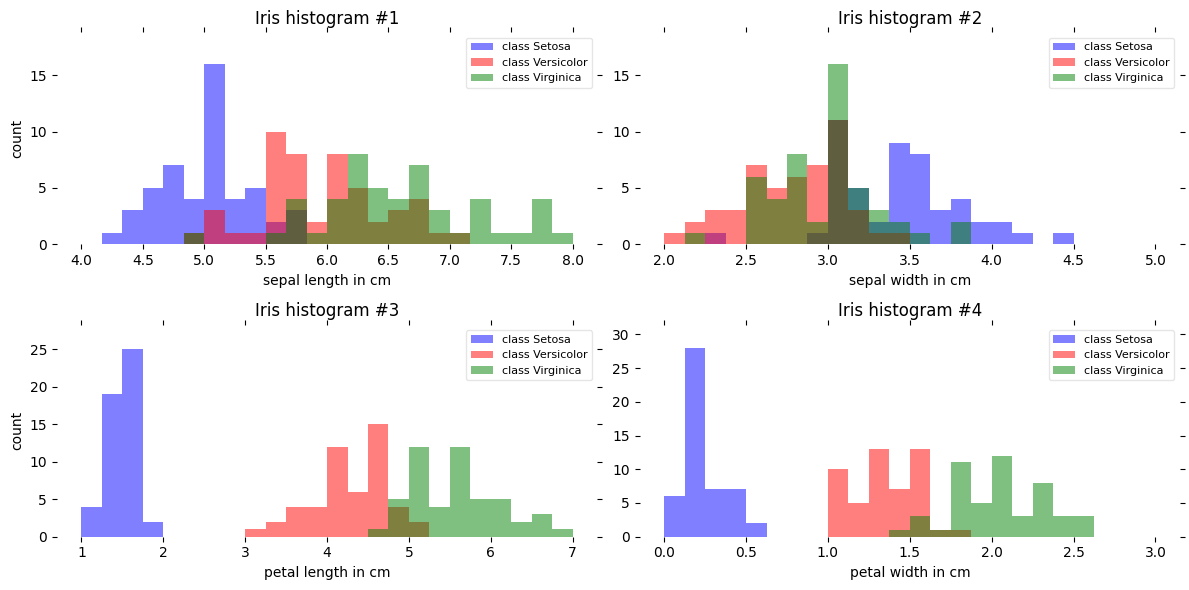

In [17]:
# understand the data
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

## Step 1: Computing the d-dimensional mean vectors

In [18]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



## Step 2: Computing the Scatter Matrices

In [20]:
# 2.1 within class scatter matrix S_W
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [21]:
# 2.2 between class scatter matrix
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


## Step 3: Solving the generalized eigenvalue problem for the matrix $S^{-1}_W S_B$

In [22]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.4287]
 [-0.1529]
 [-0.2261]
 [ 0.8612]]
Eigenvalue 3: -2.43e-15

Eigenvector 4: 
[[ 0.2491]
 [-0.4063]
 [-0.4656]
 [ 0.7458]]
Eigenvalue 4: 5.03e-15


### Checking the eigenvector-eigenvalue calculation

In [23]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


## Step 4: Selecting linear discriminants for the new feature subspace

In [24]:
# sorting the eigenvectors by decreasing eigenvalues
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972979
0.2775668638400533
5.031679977536618e-15
2.427891303550319e-15


In [25]:
# express the explained variance as percentage
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [26]:
# 4.2 choosing k eigenvectors with the largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


## Step 5: Transforming the samples onto the new subspace

In [27]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

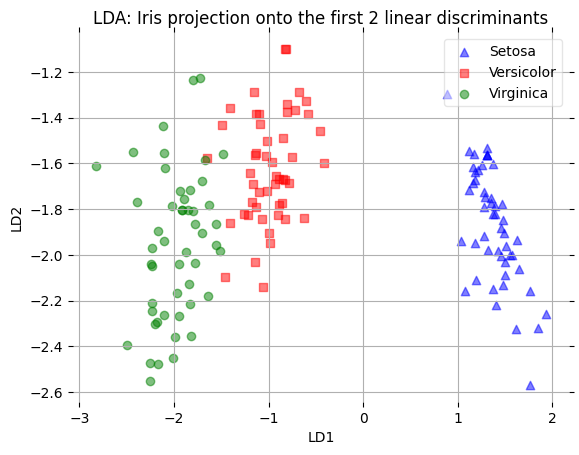

In [28]:
# plot
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

## PCA vs LDA

In [29]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

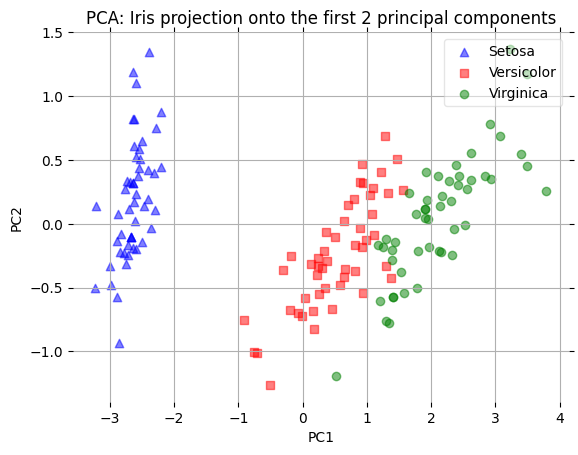

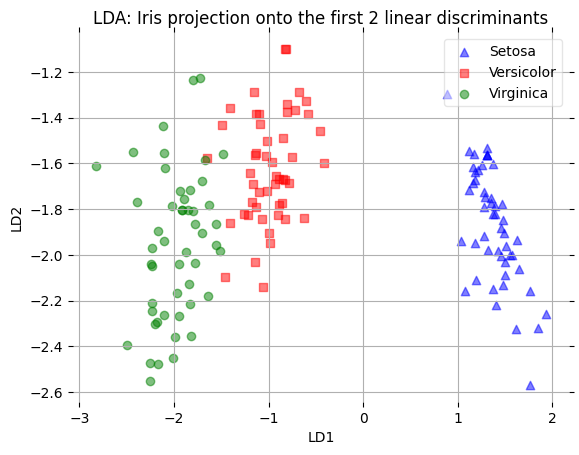

In [30]:
plot_pca()
plot_step_lda()